INFO:tensorflow:Restoring parameters from ./model.cpkt


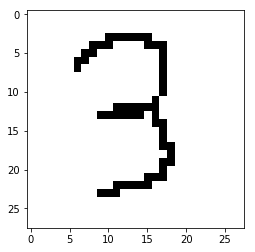

[3]


In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
import numpy as np

L1=784
L2=800
L3=10
x = tf.placeholder(tf.float32, [None, L1])
W1 = tf.Variable(tf.truncated_normal([L1, L2], stddev=0.1))
b1 = tf.Variable(tf.truncated_normal([L2], stddev=0.1))
z = tf.nn.sigmoid(tf.matmul(x, W1) + b1)
W2 = tf.Variable(tf.truncated_normal([L2, L3], stddev=0.1))
b2 = tf.Variable(tf.truncated_normal([L3], stddev=0.1))
y = tf.nn.softmax(tf.matmul(z, W2) + b2)
y_ = tf.placeholder(tf.float32, [None, L3])

cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))
train_step = tf.train.GradientDescentOptimizer(0.3).minimize(cross_entropy)
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

sess = tf.InteractiveSession()

saver = tf.train.Saver()
saver.restore(sess, './model.cpkt')

def rgb2gray(rgb):
    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
    return gray

img = mpimg.imread('3.png')
gray = rgb2gray(img)
test = 1 - np.array(gray.reshape(1, 784))
#Визуализация изображения
plt.imshow(gray, cmap='gray')
plt.show()

#Получение предсказания для своего изображения
print(sess.run(tf.argmax(y, 1), feed_dict={x: test}))